# Chapter 9. Plotting and Visualization

## 9.1 A brief matplotlib API primer

In [173]:
%matplotlib inline

In [174]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(0)

plt.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(8, 5), facecolor='white')

In [175]:
data  = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

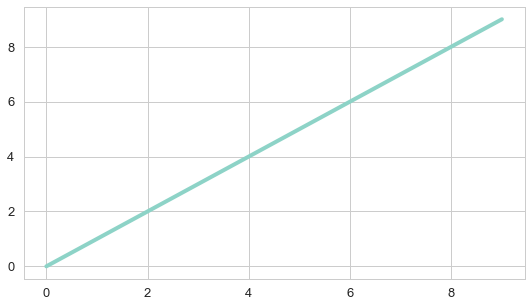

In [176]:
plt.plot(data)

### Figures and subplots

Plots reside in a `Figure` object.
One or more subplots must be added.
Below, a 2x2 grid is created and the first subplot is set to `ax1`, the second to `ax2`, etc.

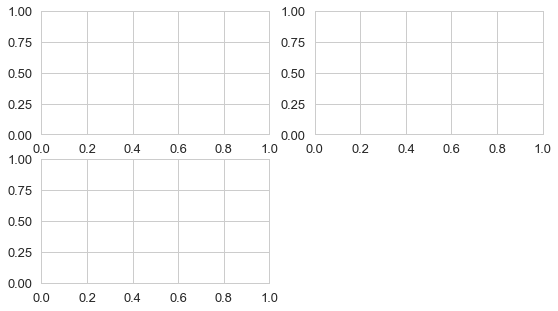

In [177]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

When a plotting command is issued, such as `plt.plot([1.5, 3.5, -2, 1.6])`, the last figure and subplot used is drawn to.

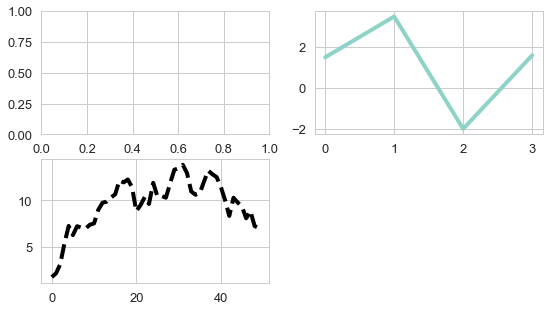

In [178]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)

ax2 = fig.add_subplot(2, 2, 2)
plt.plot([1.5, 3.5, -2, 1.6])

ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')

Alternatively, the objects returned by `fig.add_subplot()` can be added to directly.

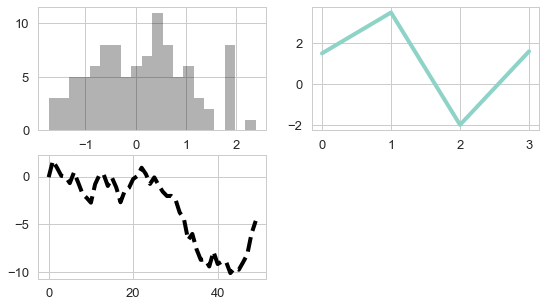

In [179]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

ax2 = fig.add_subplot(2, 2, 2)
plt.plot([1.5, 3.5, -2, 1.6])

ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')

The author mentions that there are options in `fig.subplot` to declare that some subplots should have the same axes.
An example is shown in the next section.
The trick is to work on the `axes` array that is returned by `plt.subplots()`.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13b050c10>,
      dtype=object)

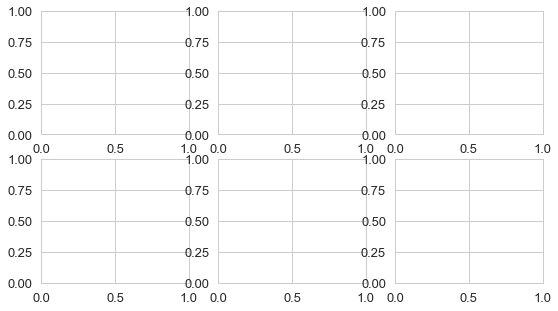

In [180]:
fig, axes = plt.subplots(2, 3)
axes

### Adjusting the spacing around subplots

All of the spacing is specified relative to the height and width of the plot.

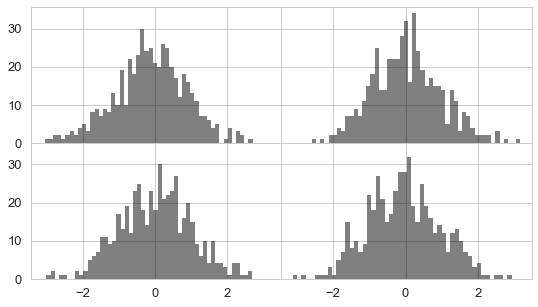

In [181]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, markers, and line styles

The color and linestyle can be specified together or separately:

```python
ax.plot(x, y, 'g--')
ax.plot(x, y, linestyle='--', color='g')
```

Any color can be specified by its hex code.

Markers can also be used to highlight the data points.

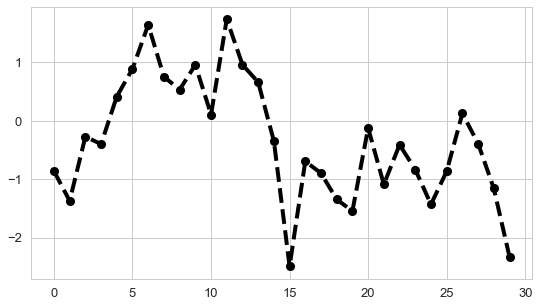

In [182]:
plt.plot(np.random.randn(30).cumsum(), 'ko--')

Which is equivalent to the more verbose statement below.

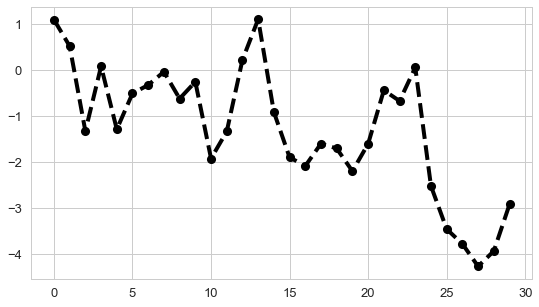

In [183]:
plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

The type of interpolation between points on a line plot can be specified; the default is `'linear'`.

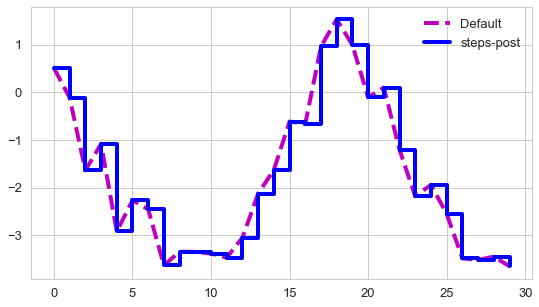

In [184]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'm--', label='Default')
plt.plot(data, 'b-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

Ticks, labels, and legends

The general interactive API used for *pyplot* uses methods like `xlim()`, `xticks()`, and `xticklabels()` in two ways:

1. called with no paramters, the current values are returned,
2. called with paramteres, the values are set.

All such methods act on the active or most recently created `AxesSubplot` object.
These two methods actaully refer to two different methods on the subplot object, such as `ax.get_xlim()` and `ax.set_xlim()` - it is often recommended to explicitly use these.

Text(0.5, 0, 'Stages')

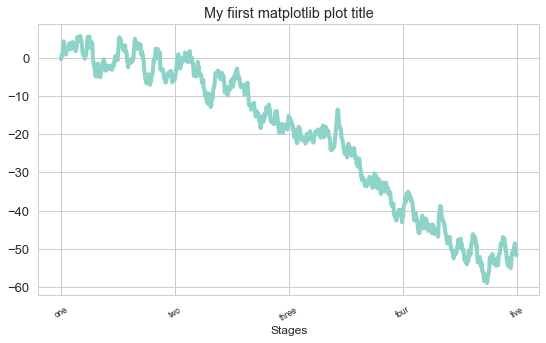

In [185]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30,
                            fontsize='small')
ax.set_title('My fiirst matplotlib plot title')
ax.set_xlabel('Stages')

The easiest way of creating a legend is to pass a `label` argument to each plot.

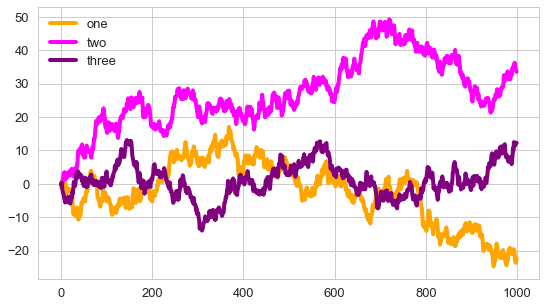

In [186]:
def make_random_data(n=1000):
    return np.random.randn(n).cumsum()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(make_random_data(), 'orange', label='one')
ax.plot(make_random_data(), 'magenta', label='two')
ax.plot(make_random_data(), 'purple', label='three')
ax.legend(loc='best')

### Annotations and drawing on a subplot

Annotations can inclde text, arrows, or other shapes.
Some of the more common functions for such annotations include `text()`, `arrow()`, and `annotate()`.

For an example, the author plots the S&P 500 closing prices since 2007 and adds some annotations for important dates of the 2008 financial crisis.

In [187]:
from datetime import datetime

data = pd.read_csv('assets/examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx.head()

1990-02-01    328.79
1990-02-02    330.92
1990-02-05    331.85
1990-02-06    329.66
1990-02-07    333.75
Name: SPX, dtype: float64

In [188]:
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]
crisis_data

[(datetime.datetime(2007, 10, 11, 0, 0), 'Peak of bull market'),
 (datetime.datetime(2008, 3, 12, 0, 0), 'Bear Stearns Fails'),
 (datetime.datetime(2008, 9, 15, 0, 0), 'Lehman Bankruptcy')]

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

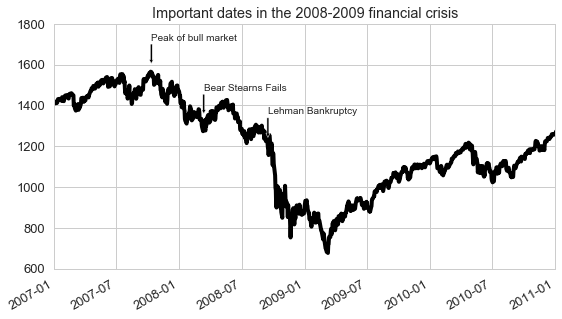

In [189]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

spx.plot(ax=ax, style='k-')

arrow_styling = {
    'facecolor': 'black', 
    'headwidth': 4, 
    'width': 2, 
    'headlength': 4
}

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=arrow_styling,
                horizontalalignment='left', verticalalignment='top')

ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

### Saving plots to file

Use the `plt.savefig('filepath.svg')` method.

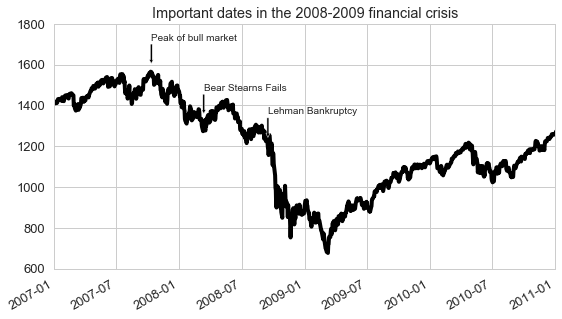

In [190]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

spx.plot(ax=ax, style='k-')

arrow_styling = {
    'facecolor': 'black', 
    'headwidth': 4, 
    'width': 2, 
    'headlength': 4
}

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=arrow_styling,
                horizontalalignment='left', verticalalignment='top')

ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

plt.savefig('assets/output/financial_crisis_annotated_plot.svg', facecolor='white')

### matplotlib configuration

Most default behavior can be customized via an extensive set of global parameters.
The default plot size can be set like so.

The first argument is the component to be customized, followed by a sequence of keyward arguments indicating the new parameter values.

```python
font_options = {
    'family': 'monospace',
    'weight': 'bold',
    'size': 'small'
}
plt.rc('font', **font_options)
```

## 9.2 Plotting with pandas and seaborn